##Aim :
 to perform various analysis and eda on the provided dataset. Also retriving the data from the given file without pandas

## Objective:
1. using multiple for loops, json and regex for getting the dataframe
1. using in-built functions to clean the data.
1. creating different graphs using seabon and plotlly
1. linear regression and other feature engineering using sklean library
1. creating different functions to get values for the required question

## Part A

In [ ]:
import re
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import random

In [ ]:

list_of_list = []
list_of_items=[]
with open("Dataset 1.txt",'r') as file:
  file = file.readlines()
  for i in range(23,len(file)):
    list_of_list.append([file[i-1],file[i]])

In [ ]:
lst = []
dict_=[]
for k in range(len(list_of_list)):
  for j in range(0,2):
    for i in list_of_list[k][j].split(" "):
      if i != "":
        lst.append(float(i))
  dict_.append(lst)
  lst =[]

In [ ]:
boston_housing = pd.DataFrame(dict_,columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV'])

In [ ]:
boston_housing.rename(columns={'MEDV':'RENT'},inplace=True)
boston_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RENT
0,0.00632,18.00,2.31,0.00000,0.538,6.575,65.2,4.0900,1.000,296.0,15.3000,396.90,4.98,24.0
1,396.90000,4.98,24.00,0.02731,0.000,7.070,0.0,0.4690,6.421,78.9,4.9671,2.00,242.00,17.8
2,0.02731,0.00,7.07,0.00000,0.469,6.421,78.9,4.9671,2.000,242.0,17.8000,396.90,9.14,21.6
3,396.90000,9.14,21.60,0.02729,0.000,7.070,0.0,0.4690,7.185,61.1,4.9671,2.00,242.00,17.8
4,0.02729,0.00,7.07,0.00000,0.469,7.185,61.1,4.9671,2.000,242.0,17.8000,392.83,4.03,34.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,0.06076,0.00,11.93,0.00000,0.573,6.976,91.0,2.1675,1.000,273.0,21.0000,396.90,5.64,23.9
1007,396.90000,5.64,23.90,0.10959,0.000,11.930,0.0,0.5730,6.794,89.3,2.3889,1.00,273.00,21.0
1008,0.10959,0.00,11.93,0.00000,0.573,6.794,89.3,2.3889,1.000,273.0,21.0000,393.45,6.48,22.0
1009,393.45000,6.48,22.00,0.04741,0.000,11.930,0.0,0.5730,6.030,80.8,2.5050,1.00,273.00,21.0


## Part B

In [ ]:
def createRows(df,n_copies):
  random.seed(10)
  subset = df[df.iloc[:, -1] > 1]   # getting the last column as a dataframe
  # making new rows
  extra = pd.concat([subset] * n_copies).add(np.random.uniform(0,50, len(subset) * n_copies), axis='rows')
  # making a new data set
  result = df.append(extra, ignore_index=True)
  return result

In [ ]:
boston_housing=createRows(boston_housing,1)

In [ ]:
boston_housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'RENT'],
      dtype='object')

In [ ]:
## CRUD opeartions
boston_housing_update=boston_housing.drop(labels=range(1111,2022), axis=0)

In [ ]:
boston_housing_update

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RENT
0,0.006320,18.000000,2.310000,0.000000,0.538000,6.575000,65.200000,4.090000,1.000000,296.000000,15.300000,396.900000,4.980000,24.000000
1,396.900000,4.980000,24.000000,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000
2,0.027310,0.000000,7.070000,0.000000,0.469000,6.421000,78.900000,4.967100,2.000000,242.000000,17.800000,396.900000,9.140000,21.600000
3,396.900000,9.140000,21.600000,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000
4,0.027290,0.000000,7.070000,0.000000,0.469000,7.185000,61.100000,4.967100,2.000000,242.000000,17.800000,392.830000,4.030000,34.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,440.214001,66.274001,64.074001,47.727871,47.474001,54.384001,47.474001,47.922001,52.873001,142.774001,53.344001,50.474001,280.474001,65.374001
1107,8.469599,8.215729,15.125729,8.215729,8.663729,13.614729,103.515729,14.085729,11.215729,241.215729,26.115729,405.115729,39.025729,22.615729
1108,399.944649,33.854649,17.444649,3.264419,3.044649,9.954649,3.044649,3.492649,8.646649,65.044649,9.132349,6.044649,236.044649,20.944649
1109,10.715299,10.495529,17.405529,10.495529,10.943529,16.097529,72.495529,16.583229,13.495529,243.495529,28.395529,407.395529,26.695529,29.895529


In [ ]:
value = list(boston_housing_update.quantile([0,0.25,0.5,0.75,1],'index').iloc[:,8])
value

[1.0, 5.0, 6.0, 6.8725000000000005, 24.0]

In [ ]:
# for RAD categorization:
# 4 is the index of most accessibility to radial highways  - 

for i in range(len(boston_housing_update.index)):
  if boston_housing_update['RAD'][i] > value[3]:
    boston_housing_update['RAD'][i] = 4
  elif boston_housing_update['RAD'][i] > value[2]:
    boston_housing_update['RAD'][i] = 3
  elif boston_housing_update['RAD'][i] > value[1]:
    boston_housing_update['RAD'][i] = 2
  else:
    boston_housing_update['RAD'][i] = 1

In [ ]:
value1 = list(boston_housing_update.quantile([0,0.25,0.5,0.75,1],'index').iloc[:,6])
value1

[0.0, 0.0, 2.9, 77.5, 100.0]

In [ ]:
for i in range(len(boston_housing_update.index)):
  if boston_housing_update['AGE'][i] > value1[3]:
    boston_housing_update['AGE'][i] = 'Oldest'
  elif boston_housing_update['AGE'][i] > value1[2]:
    boston_housing_update['AGE'][i] = 'Old'
  elif boston_housing_update['AGE'][i] > value1[1]:
    boston_housing_update['AGE'][i] = 'Latest'
  else:
    boston_housing_update['AGE'][i] = 'New'

In [ ]:
boston_housing_update.quantile([0,0.25,0.5,0.75,1],'index')

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,RENT
0.00,0.00632,0.00,0.46,0.000000,0.000,0.460,0.38500,1.0,2.9,1.12960,0.32,1.73,5.0
0.25,0.25651,0.00,8.35,0.000000,0.000,5.860,0.53800,1.0,77.7,3.20745,5.00,11.36,17.1
0.50,23.64820,7.22,18.10,0.033590,0.453,6.411,1.12960,2.0,187.0,12.60000,24.00,37.97,19.7
0.75,391.38500,16.82,21.89,0.424045,0.631,9.690,3.20745,3.5,330.0,19.05000,391.44,330.00,21.2
1.00,396.90000,100.00,50.00,88.976200,100.000,27.740,12.12650,4.0,711.0,22.00000,396.90,711.00,50.0


In [ ]:
## Creating categorical variables
boston_housing_update=boston_housing_update.astype({'CHAS':'category','RAD':'category','AGE':'category'})

### Data exploration

In [ ]:
boston_housing_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 1010
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     1011 non-null   float64 
 1   ZN       1011 non-null   float64 
 2   INDUS    1011 non-null   float64 
 3   CHAS     1011 non-null   category
 4   NOX      1011 non-null   float64 
 5   RM       1011 non-null   float64 
 6   AGE      1011 non-null   category
 7   DIS      1011 non-null   float64 
 8   RAD      1011 non-null   category
 9   TAX      1011 non-null   float64 
 10  PTRATIO  1011 non-null   float64 
 11  B        1011 non-null   float64 
 12  LSTAT    1011 non-null   float64 
 13  RENT     1011 non-null   float64 
dtypes: category(3), float64(11)
memory usage: 151.5 KB


In [ ]:
boston_housing_update.describe()

,CRIM,ZN,INDUS,NOX,RM,DIS,TAX,PTRATIO,B,LSTAT,RENT
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,179.929380,12.012433,16.839674,5.947256,8.717038,2.176488,238.577349,11.132247,183.291850,210.360485,20.499308
std,188.102219,17.258777,9.916305,17.352163,5.443890,2.202550,208.491131,7.638740,185.353562,231.127205,6.983866
min,0.006320,0.000000,0.460000,0.000000,0.460000,0.385000,2.900000,1.129600,0.320000,1.730000,5.000000
25%,0.256510,0.000000,8.350000,0.000000,5.860000,0.538000,77.700000,3.207450,5.000000,11.360000,17.100000
50%,23.648200,7.220000,18.100000,0.453000,6.411000,1.129600,187.000000,12.600000,24.000000,37.970000,19.700000
75%,391.385000,16.820000,21.890000,0.631000,9.690000,3.207450,330.000000,19.050000,391.440000,330.000000,21.200000
max,396.900000,100.000000,50.000000,100.000000,27.740000,12.126500,711.000000,22.000000,396.900000,711.000000,50.000000


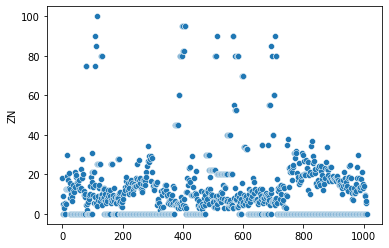

In [ ]:
## Finding the outliers
sns.scatterplot(data=boston_housing_update,x=boston_housing_update.index,y='ZN')

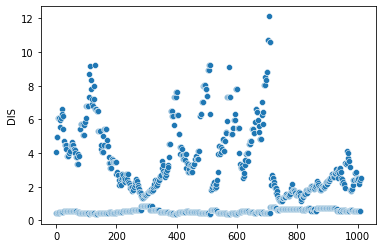

In [ ]:
## Finding the outliers
sns.scatterplot(data=boston_housing_update,x=boston_housing_update.index,y='DIS')


In [ ]:
## Removing the outliers
from scipy import stats
import numpy as np
def outliers(df,column_name):
    Q1 = np.percentile(df[column_name], 25,
                      interpolation = 'midpoint')
    
    Q3 = np.percentile(df[column_name], 75,
                      interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(df[column_name] >= (Q3+1.5*IQR))
    print(upper)
    # Below Lower bound
    lower = np.where(df[column_name] <= (Q1-1.5*IQR))

    df.drop(upper[0],axis=0, inplace = True)
    df.drop(lower[0],axis=0, inplace = True)
    return df

In [ ]:
boston_housing_update1 = outliers(boston_housing_update,'ZN')
#boston_housing_update = outliers(boston_housing_update1,'DIS')

(array([ 78,  80, 108, 110, 112, 114, 130, 132, 374, 376, 378, 380, 382,
       384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408,
       508, 510, 512, 566, 568, 570, 572, 574, 576, 578, 580, 582, 584,
       596, 598, 600, 686, 688, 694, 696, 702, 704, 706, 708, 710]),)


In [ ]:

##(array([ 78,  80, 108, 110, 112, 114, 130, 132, 374, 376, 378, 380, 382,
#      384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408,
#     508, 510, 512, 566, 568, 570, 572, 574, 576, 578, 580, 582, 584,
#    596, 598, 600, 686, 688, 694, 696, 702, 704, 706, 708, 710]),) - upper bound values to be deleted for ZINC

##(array([353, 484, 485, 486, 487, 488, 489, 490, 491, 493, 494, 495, 496,
##     499, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512,
##     513, 515, 517, 519, 520, 521, 522, 523, 524, 525, 526, 528, 529,
##     530]),)  - upper bound values to be deleted for DIS

boston_housing_update

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RENT
0,0.00632,18.00,2.31,0.00000,0.538,6.575,Old,4.0900,1.0,296.0,15.3000,396.90,4.98,24.0
1,396.90000,4.98,24.00,0.02731,0.000,7.070,New,0.4690,3.0,78.9,4.9671,2.00,242.00,17.8
2,0.02731,0.00,7.07,0.00000,0.469,6.421,Oldest,4.9671,1.0,242.0,17.8000,396.90,9.14,21.6
3,396.90000,9.14,21.60,0.02729,0.000,7.070,New,0.4690,4.0,61.1,4.9671,2.00,242.00,17.8
4,0.02729,0.00,7.07,0.00000,0.469,7.185,Old,4.9671,1.0,242.0,17.8000,392.83,4.03,34.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,0.06076,0.00,11.93,0.00000,0.573,6.976,Oldest,2.1675,1.0,273.0,21.0000,396.90,5.64,23.9
1007,396.90000,5.64,23.90,0.10959,0.000,11.930,New,0.5730,3.0,89.3,2.3889,1.00,273.00,21.0
1008,0.10959,0.00,11.93,0.00000,0.573,6.794,Oldest,2.3889,1.0,273.0,21.0000,393.45,6.48,22.0
1009,393.45000,6.48,22.00,0.04741,0.000,11.930,New,0.5730,3.0,80.8,2.5050,1.00,273.00,21.0


In [ ]:
## Rearranging the columns based on Alaphabetical order
boston_housing_update=boston_housing_update[sorted(boston_housing_update.columns)]

In [ ]:
boston_housing_update

,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RENT,RM,TAX,ZN
0,Old,396.90,0.00000,0.00632,4.0900,2.31,4.98,0.538,15.3000,1.0,24.0,6.575,296.0,18.00
1,New,2.00,0.02731,396.90000,0.4690,24.00,242.00,0.000,4.9671,3.0,17.8,7.070,78.9,4.98
2,Oldest,396.90,0.00000,0.02731,4.9671,7.07,9.14,0.469,17.8000,1.0,21.6,6.421,242.0,0.00
3,New,2.00,0.02729,396.90000,0.4690,21.60,242.00,0.000,4.9671,4.0,17.8,7.070,61.1,9.14
4,Old,392.83,0.00000,0.02729,4.9671,7.07,4.03,0.469,17.8000,1.0,34.7,7.185,242.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,Oldest,396.90,0.00000,0.06076,2.1675,11.93,5.64,0.573,21.0000,1.0,23.9,6.976,273.0,0.00
1007,New,1.00,0.10959,396.90000,0.5730,23.90,273.00,0.000,2.3889,3.0,21.0,11.930,89.3,5.64
1008,Oldest,393.45,0.00000,0.10959,2.3889,11.93,6.48,0.573,21.0000,1.0,22.0,6.794,273.0,0.00
1009,New,1.00,0.04741,393.45000,0.5730,22.00,273.00,0.000,2.5050,3.0,21.0,11.930,80.8,6.48


In [ ]:
## moving RENT column to the end

boston_housing_update.columns
# Move the required column to first
df = pd.DataFrame(boston_housing_update)
temp_cols=df.columns.tolist()
index=df.columns.get_loc("RENT")
new_cols=temp_cols[index:index+1]+ temp_cols[0:index] + temp_cols[index+1:]
boston_housing_update=df[new_cols]

# Move first column to the Last
df = pd.DataFrame(boston_housing_update)
temp_cols=df.columns.tolist()
new_cols=temp_cols[1:] + temp_cols[0:1]
boston_housing_update=df[new_cols]


boston_housing_update



,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN,RENT
0,Old,396.90,0.00000,0.00632,4.0900,2.31,4.98,0.538,15.3000,1.0,6.575,296.0,18.00,24.0
1,New,2.00,0.02731,396.90000,0.4690,24.00,242.00,0.000,4.9671,3.0,7.070,78.9,4.98,17.8
2,Oldest,396.90,0.00000,0.02731,4.9671,7.07,9.14,0.469,17.8000,1.0,6.421,242.0,0.00,21.6
3,New,2.00,0.02729,396.90000,0.4690,21.60,242.00,0.000,4.9671,4.0,7.070,61.1,9.14,17.8
4,Old,392.83,0.00000,0.02729,4.9671,7.07,4.03,0.469,17.8000,1.0,7.185,242.0,0.00,34.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,Oldest,396.90,0.00000,0.06076,2.1675,11.93,5.64,0.573,21.0000,1.0,6.976,273.0,0.00,23.9
1007,New,1.00,0.10959,396.90000,0.5730,23.90,273.00,0.000,2.3889,3.0,11.930,89.3,5.64,21.0
1008,Oldest,393.45,0.00000,0.10959,2.3889,11.93,6.48,0.573,21.0000,1.0,6.794,273.0,0.00,22.0
1009,New,1.00,0.04741,393.45000,0.5730,22.00,273.00,0.000,2.5050,3.0,11.930,80.8,6.48,21.0


In [ ]:
## Obserevations from correlation
boston_housing_update.corr()

,B,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RM,TAX,ZN,RENT
B,1.000000,-0.882881,0.778411,-0.575424,-0.779407,-0.293781,0.885109,-0.390859,0.681586,-0.348880,0.345522
CRIM,-0.882881,1.000000,-0.725393,0.597255,0.713578,0.342462,-0.878776,0.301227,-0.767943,0.329485,-0.258801
DIS,0.778411,-0.725393,1.000000,-0.630288,-0.636590,-0.254722,0.710359,-0.296813,0.423019,-0.068679,0.310573
INDUS,-0.575424,0.597255,-0.630288,1.000000,0.303270,0.388194,-0.463647,-0.063186,-0.278346,-0.198058,-0.413013
LSTAT,-0.779407,0.713578,-0.636590,0.303270,1.000000,0.100085,-0.872990,0.713226,-0.666871,0.516525,-0.166944
NOX,-0.293781,0.342462,-0.254722,0.388194,0.100085,1.000000,-0.166721,-0.320491,-0.299807,-0.068305,-0.166327
PTRATIO,0.885109,-0.878776,0.710359,-0.463647,-0.872990,-0.166721,1.000000,-0.555273,0.824569,-0.510955,0.148388
RM,-0.390859,0.301227,-0.296813,-0.063186,0.713226,-0.320491,-0.555273,1.000000,-0.320516,0.489399,0.024965
TAX,0.681586,-0.767943,0.423019,-0.278346,-0.666871,-0.299807,0.824569,-0.320516,1.000000,-0.470464,-0.029116
ZN,-0.348880,0.329485,-0.068679,-0.198058,0.516525,-0.068305,-0.510955,0.489399,-0.470464,1.000000,0.129086


- Positively related variables are PTRATIO and NOX. (observation) 
   - corr = 0.978693 
   - Thus implies that people are studying in a region where nitrogen oxides concentration is more. (Result)
- Non-retail business(indus) and lower status population are related positively
   - corr = 0.830518
   - people are making business that derives less than ten percent (10%) of its total revenue from sales to the lower status population
- Blacks people and crime is negative weakly related
   - corr = -0.110930
   - major cause of crime can be black peope living in the area.
   - corr = -0.456379	- b with tax
   - black people are also the least tax paying race in the town
- Black people and Non-retail business(indus) are also negatively realated 
   - corr = -0.047296
   - As black people don't have business in the town may effect crime and tax.

In [ ]:
## Comparing plotlly and seaborn plots

import plotly.io as pio

aggs = ["count","sum","avg","median","mode","rms","stddev","min","max","first","last"]

agg = []
agg_func = []
for i in range(0, len(aggs)):
    agg = dict(
        args=['transforms[0].aggregations[0].func', aggs[i]],
        label=aggs[i],
        method='restyle'
    )
    agg_func.append(agg)


data = [dict(
  type = 'scatter',
  x = boston_housing_update['CHAS'],
  y = boston_housing_update['AGE'],
  mode = 'markers',
  transforms = [dict(
    type = 'aggregate',
    groups = boston_housing_update['CHAS'],
    aggregations = [dict(
        target = 'y', func = 'sum', enabled = True)
    ]
  )]
)]

layout = dict(
  title = '<b>Plotly Aggregations</b><br>use dropdown to change aggregation',
  xaxis = dict(title = 'Subject'),
  yaxis = dict(title = 'Score', range = [0,22]),
  updatemenus = [dict(
        x = 0.85,
        y = 1.15,
        xref = 'paper',
        yref = 'paper',
        yanchor = 'top',
        active = 1,
        showactive = False,
        buttons = agg_func
  )]
)

fig_dict = dict(data=data, layout=layout)

pio.show(fig_dict, validate=False)

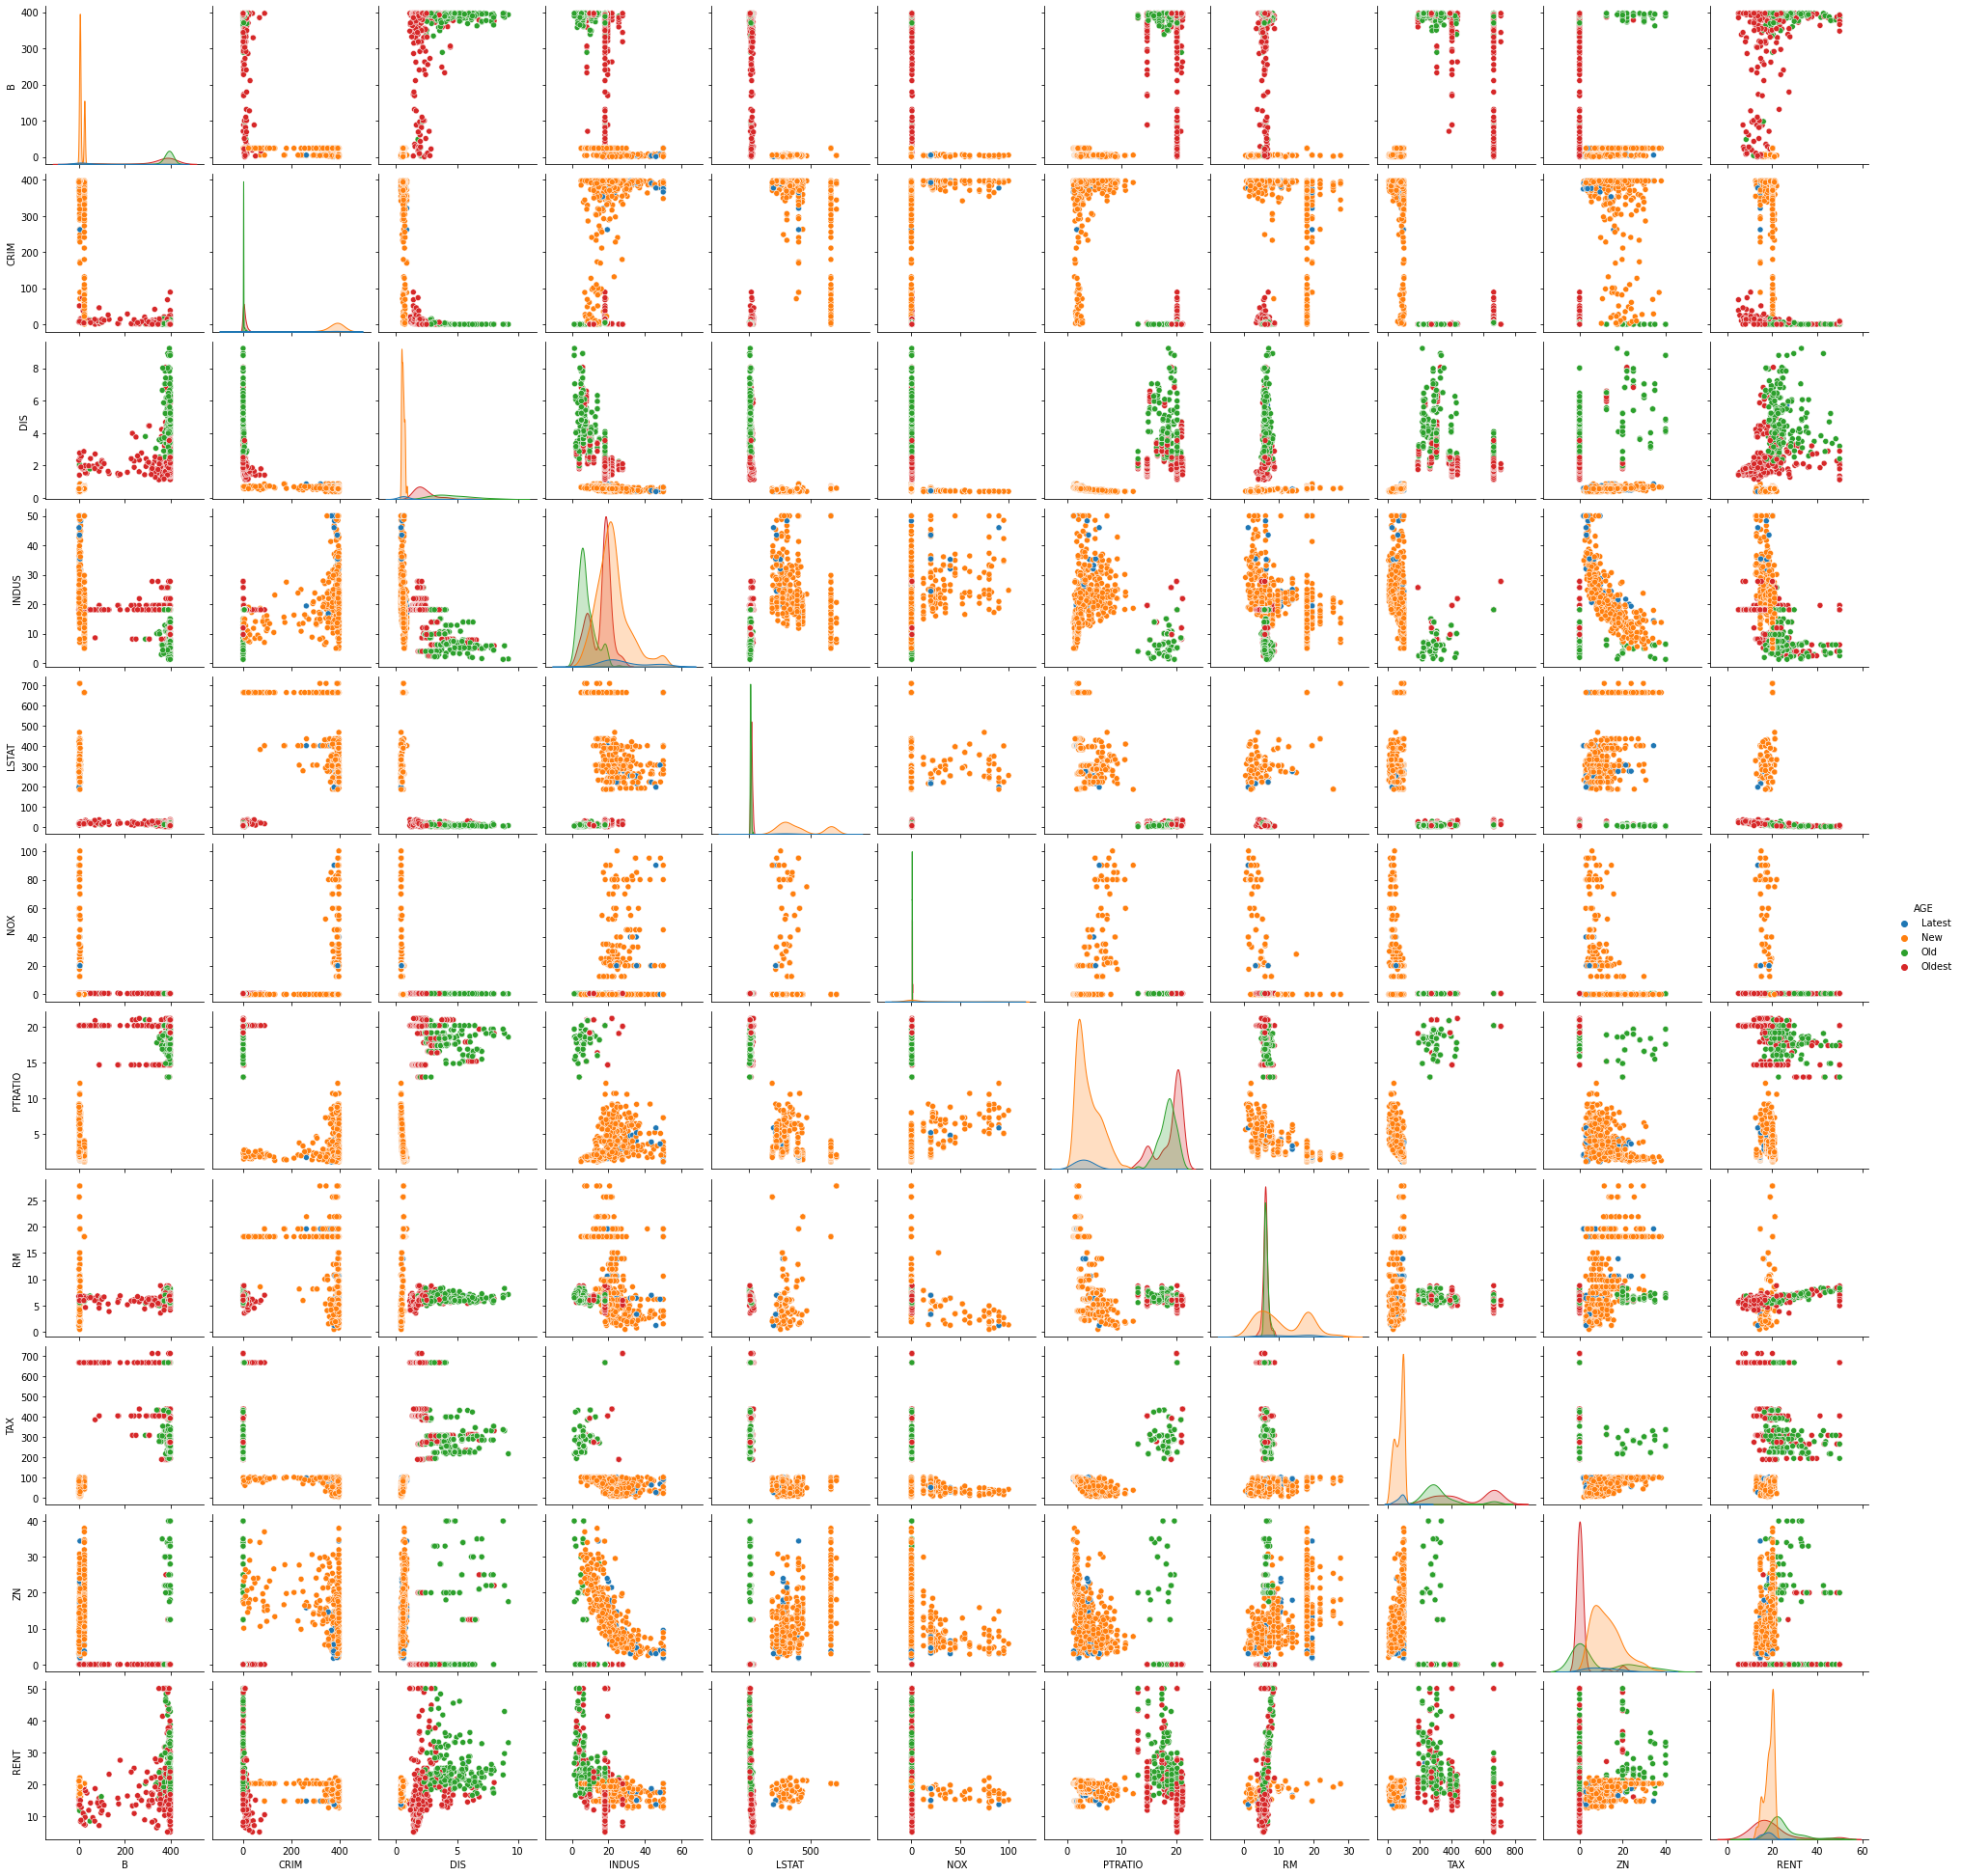

In [ ]:
sns.pairplot(boston_housing_update,hue='AGE')

- plotlly plots are more interactive than seaborn plots
- much better visualizations 
- more agrregated functions can be seen just by using plotlly (without really using the functions)

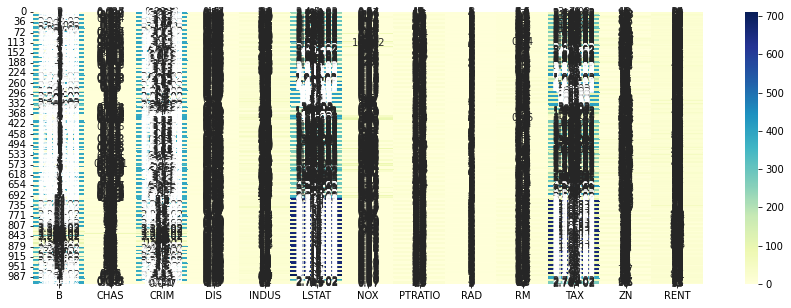

In [ ]:
import matplotlib.pyplot as plt
boston_housing_update1=boston_housing_update.drop('AGE',axis=1)
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(boston_housing_update1,annot=True, ax=ax,cmap="YlGnBu")

In [ ]:
boston_housing_update.dtypes

AGE        category
B           float64
CHAS       category
CRIM        float64
DIS         float64
INDUS       float64
LSTAT       float64
NOX         float64
PTRATIO     float64
RAD        category
RM          float64
TAX         float64
ZN          float64
RENT        float64
dtype: object

## Feature Engineering

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
label_encoder.fit_transform(boston_housing_update['AGE'])
  
boston_housing_update['AGE'].unique()

['Old', 'New', 'Oldest', 'Latest']
Categories (4, object): ['Latest', 'New', 'Old', 'Oldest']

In [ ]:
mms = MinMaxScaler()
v=mms.fit_transform(boston_housing_update[['CHAS']])

In [ ]:
max(v)

array([1.])

- Maximum value present in the dataset is represented by 1 amd minimum by 0


In [ ]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
f = ss.fit_transform(boston_housing_update[['CHAS']])

In [ ]:
min(f)

array([-0.29909062])

In [ ]:
max(f)

array([13.41813827])

- normalizes the dataset
- to normalize the data in CHAS column the values will fluctuate from -0.35561067 to 4.67580362

## Part C

### Visualizations

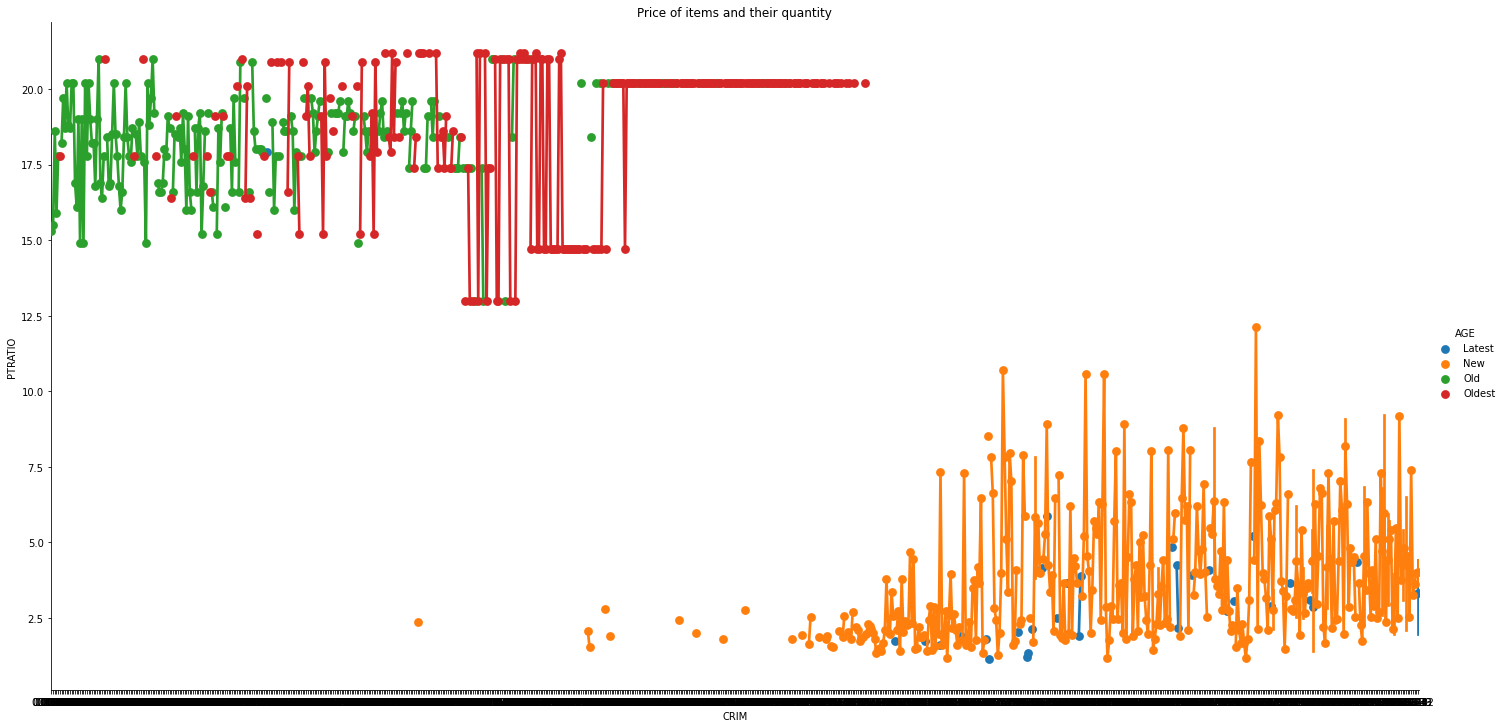

In [ ]:
sns.catplot(x ='CRIM', y ='PTRATIO',
               hue = 'AGE', data = boston_housing_update,kind="point",aspect=2,height=10)

plt.title("Price of items and their quantity")
plt.show()

- As crime rate increased the pupil teacher ration increased
- While most of the senior are commiting crime 
   - maybe they are illiterate and are made to study 

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



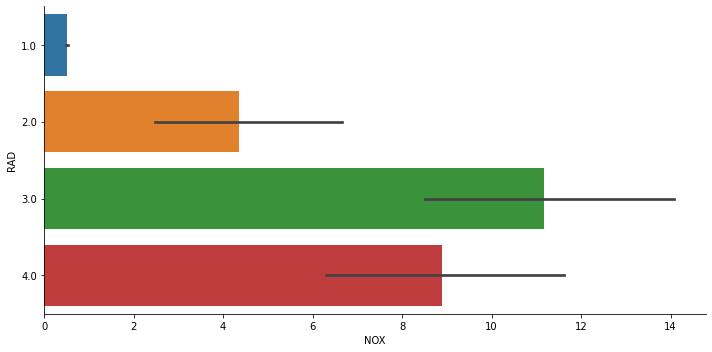

In [ ]:

g = sns.catplot(y="RAD",
                x="NOX",
                kind="bar",
                data=boston_housing_update,aspect=2)

- As access to the radial highway increases the nitrogen oxides concentration increases
   - means the air polution is high near the highways
   

In [ ]:
boston_housing_update

,AGE,B,CHAS,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN,RENT
0,Old,396.90,0.00000,0.00632,4.0900,2.31,4.98,0.538,15.3000,1.0,6.575,296.0,18.00,24.0
1,New,2.00,0.02731,396.90000,0.4690,24.00,242.00,0.000,4.9671,3.0,7.070,78.9,4.98,17.8
2,Oldest,396.90,0.00000,0.02731,4.9671,7.07,9.14,0.469,17.8000,1.0,6.421,242.0,0.00,21.6
3,New,2.00,0.02729,396.90000,0.4690,21.60,242.00,0.000,4.9671,4.0,7.070,61.1,9.14,17.8
4,Old,392.83,0.00000,0.02729,4.9671,7.07,4.03,0.469,17.8000,1.0,7.185,242.0,0.00,34.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,Oldest,396.90,0.00000,0.06076,2.1675,11.93,5.64,0.573,21.0000,1.0,6.976,273.0,0.00,23.9
1007,New,1.00,0.10959,396.90000,0.5730,23.90,273.00,0.000,2.3889,3.0,11.930,89.3,5.64,21.0
1008,Oldest,393.45,0.00000,0.10959,2.3889,11.93,6.48,0.573,21.0000,1.0,6.794,273.0,0.00,22.0
1009,New,1.00,0.04741,393.45000,0.5730,22.00,273.00,0.000,2.5050,3.0,11.930,80.8,6.48,21.0


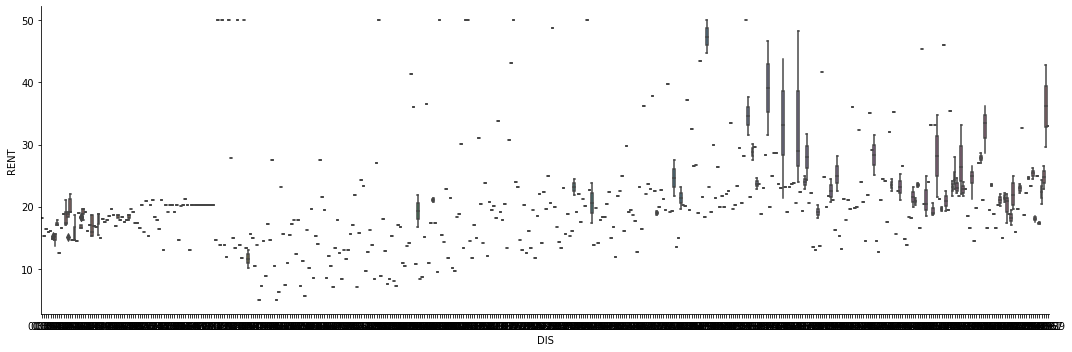

In [ ]:
sns.catplot(
    data=boston_housing_update, x='DIS', y='RENT', kind='box',aspect=3)

## Part D

10 questions : <br>

1.    Function to identify categorical features?
2.   Function to identify numeric features
3.   Find unique values in the dataset?
2.   Find null values in the dataset?
1. Function to check the datatypes of all the columns?
1. Function to detect outliers in every feature?
1. Remove column from the dataset?
1. Graphs with relation to the predicted values for the dataset?
1. Draw a probability density grapgh with respect to rent?
1. Mean price per each CHAS and plot it?







In [ ]:
# Question 1:
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(boston_housing_update)
print("Categorical Features:")
print(categorical_columns)

Categorical Features:
      AGE     CHAS  RAD
0     Old  0.00000  1.0
1     New  0.02731  3.0
2  Oldest  0.00000  1.0
3     New  0.02729  4.0
4     Old  0.00000  1.0


In [ ]:
# Question 2:

def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()
    
numeric_columns = numeric_features(boston_housing_update)
print("Numerical Features:")
print(numeric_columns)

Numerical Features:
        B       CRIM     DIS  INDUS   LSTAT    NOX  PTRATIO     RM    TAX  \
0  396.90    0.00632  4.0900   2.31    4.98  0.538  15.3000  6.575  296.0   
1    2.00  396.90000  0.4690  24.00  242.00  0.000   4.9671  7.070   78.9   
2  396.90    0.02731  4.9671   7.07    9.14  0.469  17.8000  6.421  242.0   
3    2.00  396.90000  0.4690  21.60  242.00  0.000   4.9671  7.070   61.1   
4  392.83    0.02729  4.9671   7.07    4.03  0.469  17.8000  7.185  242.0   

      ZN  RENT  
0  18.00  24.0  
1   4.98  17.8  
2   0.00  21.6  
3   9.14  17.8  
4   0.00  34.7  


In [ ]:
# question 3
boston_housing_update.nunique()

AGE          4
B          336
CHAS       505
CRIM       811
DIS        464
INDUS      277
LSTAT      480
NOX         90
PTRATIO    446
RAD          4
RM         481
TAX        398
ZN         467
RENT       215
dtype: int64

In [ ]:
# question 4
boston_housing_update.isnull().sum()

AGE        0
B          0
CHAS       0
CRIM       0
DIS        0
INDUS      0
LSTAT      0
NOX        0
PTRATIO    0
RAD        0
RM         0
TAX        0
ZN         0
RENT       0
dtype: int64

In [ ]:
# Question 5:
def check_datatypes(dataset):
    return dataset.dtypes

print("Datatypes of all the columns:")
check_datatypes(boston_housing_update)

Datatypes of all the columns:


AGE        category
B           float64
CHAS       category
CRIM        float64
DIS         float64
INDUS       float64
LSTAT       float64
NOX         float64
PTRATIO     float64
RAD        category
RM          float64
TAX         float64
ZN          float64
RENT        float64
dtype: object

In [ ]:
# Question 6:
def detect_outliers(df):
    cols = list(df)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in df.select_dtypes(include=np.number).columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':df.loc[(df[column] < fence_low) | (df[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(boston_housing_update)

,Feature,Number of Outliers
0,B,0
1,CRIM,0
2,DIS,44
3,INDUS,31
4,LSTAT,0
5,NOX,133
6,PTRATIO,0
7,RM,189
8,TAX,5
9,ZN,9


In [ ]:
# Question 7:
boston_housing_update.drop(['CHAS'],axis=1,inplace=True)

# Axis=1 means that the execution happens column wise. This means that column will be removed.
# Inplace=True means that the change is permanent.
# If we inplace= false, then only in this parocular step, the column will be removed and in further steps, it will be back.

# Again viewing the dataset to see the change.
boston_housing_update.head()

,RENT,AGE,B,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,RM,TAX,ZN
0,24.0,Old,396.90,0.00632,4.0900,2.31,4.98,0.538,15.3000,1.0,6.575,296.0,18.00
1,17.8,New,2.00,396.90000,0.4690,24.00,242.00,0.000,4.9671,3.0,7.070,78.9,4.98
2,21.6,Oldest,396.90,0.02731,4.9671,7.07,9.14,0.469,17.8000,1.0,6.421,242.0,0.00
3,17.8,New,2.00,396.90000,0.4690,21.60,242.00,0.000,4.9671,4.0,7.070,61.1,9.14
4,34.7,Old,392.83,0.02729,4.9671,7.07,4.03,0.469,17.8000,1.0,7.185,242.0,0.00


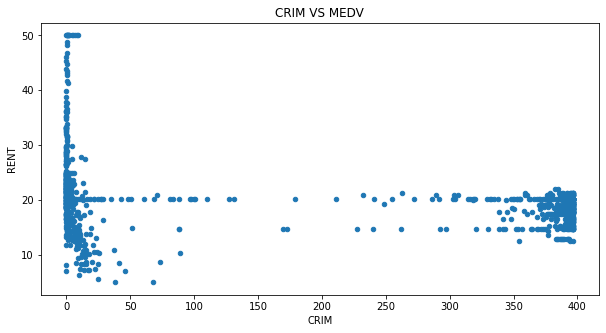

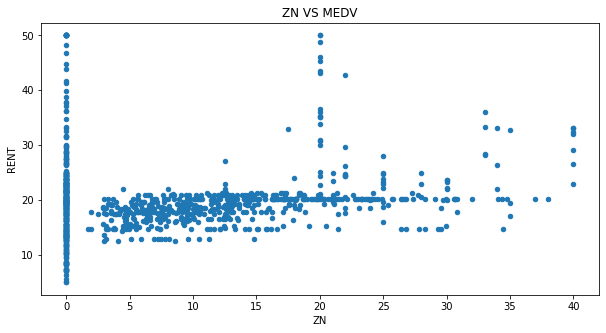

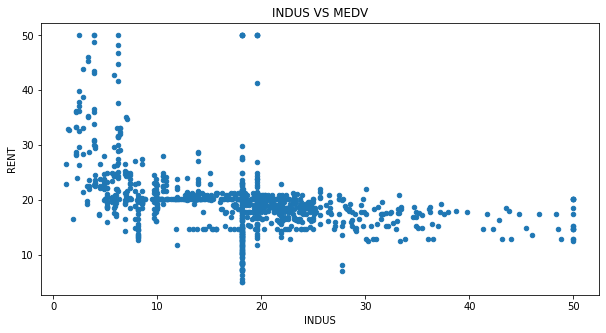

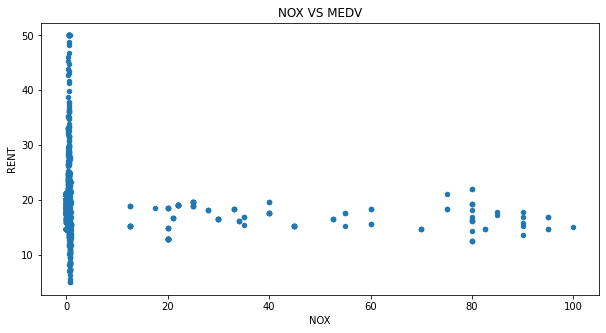

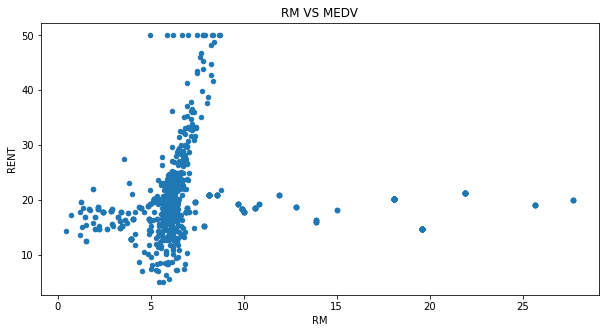

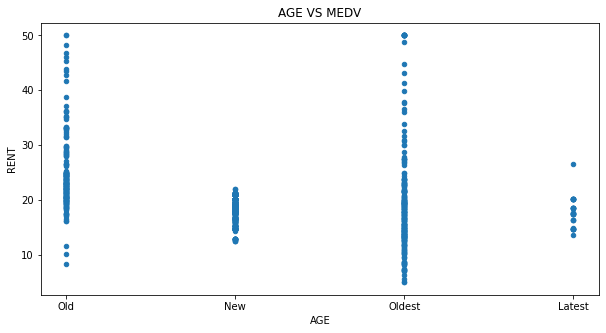

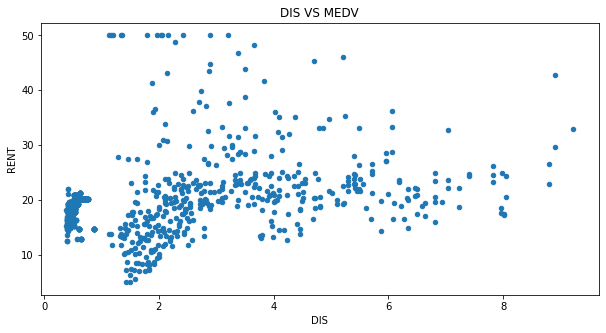

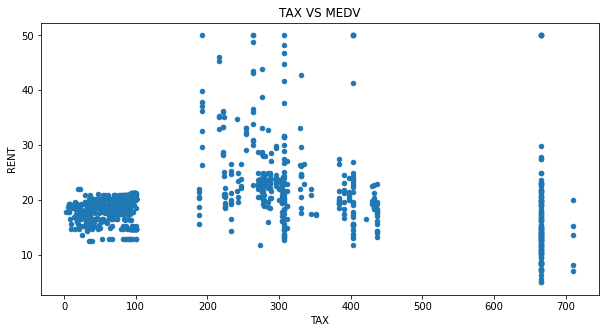

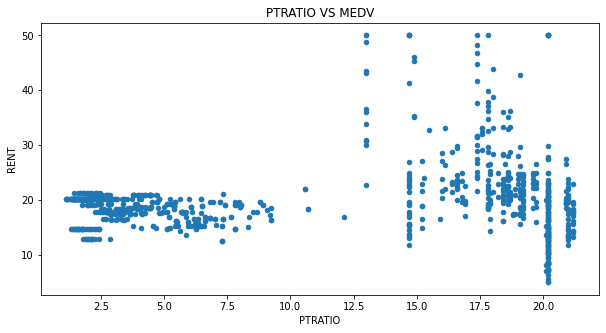

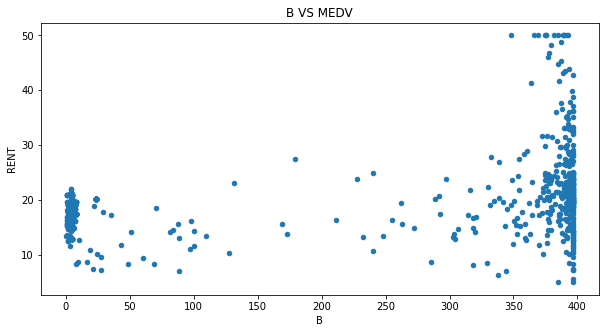

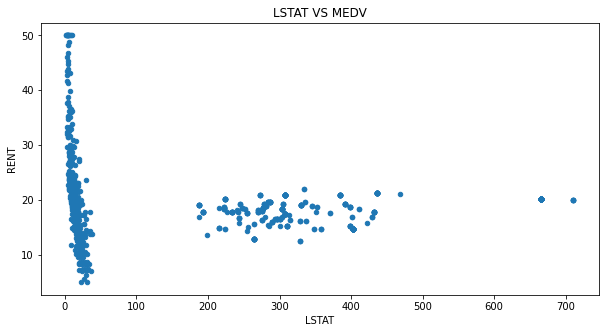

In [ ]:
# Question 8:
ContinuousCols=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                 'PTRATIO', 'B', 'LSTAT']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    boston_housing_update.plot.scatter(x=predictor, y='RENT', figsize=(10,5), title=predictor+" VS "+ 'MEDV')

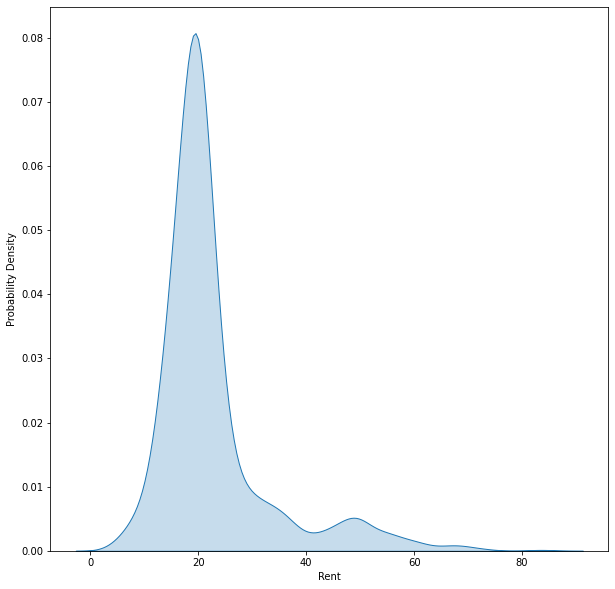

In [ ]:
# Question 9:

plt.figure(figsize=(10,10))
sns.kdeplot(boston_housing_update.RENT, shade=True, Label="RENT")
plt.xlabel('Rent')
plt.ylabel('Probability Density')
plt.show()

In [ ]:
mean_price_chas = boston_housing_update[['CHAS', 'RENT']].groupby('CHAS', as_index = False).mean()
mean_price_chas

,CHAS,RENT
0,0.00000,22.093843
1,0.00906,15.300000
2,0.01096,15.300000
3,0.01301,15.500000
4,0.01311,17.900000
...,...,...
600,50.24535,70.573440
601,51.13580,20.200000
602,67.92080,20.200000
603,73.53410,20.200000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



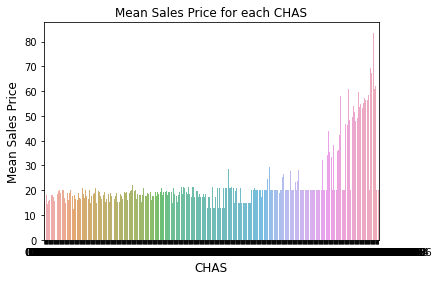

In [ ]:
sns.barplot(mean_price_chas['CHAS'], mean_price_chas['RENT'], alpha = 0.8)
plt.title('Mean Sales Price for each CHAS')
plt.ylabel('Mean Sales Price', fontsize = 12)
plt.xlabel('CHAS', fontsize = 12)
plt.show()

In [ ]:
boston_housing_update.drop(['AGE','CHAS','RAD'], axis=1)

,CRIM,ZN,INDUS,NOX,RM,DIS,TAX,PTRATIO,B,LSTAT,RENT
0,0.006320,18.000000,2.310000,0.538000,6.575000,4.090000,296.000000,15.300000,396.900000,4.980000,24.000000
1,396.900000,4.980000,24.000000,0.000000,7.070000,0.469000,78.900000,4.967100,2.000000,242.000000,17.800000
2,0.027310,0.000000,7.070000,0.469000,6.421000,4.967100,242.000000,17.800000,396.900000,9.140000,21.600000
3,396.900000,9.140000,21.600000,0.000000,7.070000,0.469000,61.100000,4.967100,2.000000,242.000000,17.800000
4,0.027290,0.000000,7.070000,0.469000,7.185000,4.967100,242.000000,17.800000,392.830000,4.030000,34.700000
...,...,...,...,...,...,...,...,...,...,...,...
1106,440.214001,66.274001,64.074001,47.474001,54.384001,47.922001,142.774001,53.344001,50.474001,280.474001,65.374001
1107,8.469599,8.215729,15.125729,8.663729,13.614729,14.085729,241.215729,26.115729,405.115729,39.025729,22.615729
1108,399.944649,33.854649,17.444649,3.044649,9.954649,3.492649,65.044649,9.132349,6.044649,236.044649,20.944649
1109,10.715299,10.495529,17.405529,10.943529,16.097529,16.583229,243.495529,28.395529,407.395529,26.695529,29.895529


In [ ]:
X = pd.DataFrame(np.c_[boston_housing_update['CRIM'], boston_housing_update['ZN'],boston_housing_update['INDUS'], boston_housing_update['NOX'], boston_housing_update['RM'], boston_housing_update['DIS'], boston_housing_update['TAX'],boston_housing_update['PTRATIO'], boston_housing_update['B'],boston_housing_update['LSTAT']], columns = ['CRIM', 'ZN', 'INDUS',  'NOX', 'RM', 'DIS', 'TAX','PTRATIO', 'B', 'LSTAT'])

y=boston_housing_update['RENT']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=5)

## Using linear regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred=lin_model.predict(X_test)
y_pred

array([31.73512167, 20.73833012, 23.22622353, 23.35990252, 20.26100183,
       15.96203465, 17.53865421, 18.7945092 , 19.73731062, 24.5943665 ,
       22.78091568, 51.42607336, 19.18762805, 19.92998173, 19.18057779,
       26.35956665, 19.52834104, 25.71475854, 22.24840522, 18.31955025,
       19.6460323 , 16.33933129, 17.13783905, 55.2693231 , 18.1382489 ,
       19.63701307, 18.70870998, 17.17168307, 17.78583512, 19.53807824,
       31.81271246, 26.55118508, 20.85774026, 22.52745668, 17.06220697,
       26.62240406, 19.45363316, 22.96297426, 20.5873935 , 17.12190344,
       23.15059229, 22.98774455, 17.41622723, 34.57067554, 17.07167052,
       16.18779712, 20.36412448, 18.19350806, 25.79980854, 18.10813153,
       19.83156672, 17.08496231, 18.65306871, 22.07053537, 18.07426062,
       44.2880902 , 48.09865   , 23.28859655, 12.43985251, 23.60531906,
       16.79046812, 22.61481284, 22.88872913, 37.1140344 , 19.41205204,
       19.82763091, 17.18067257, 12.8407736 , 19.49595808, 43.31

In [ ]:
lin_model.score(X_test,y_test)

0.6977764916123441

In [ ]:
x_test=pd.DataFrame(np.c_[[10.163499]	,[22.093499]	,[10.163499]	,[10.736499]	,[16.193499]	,[90.963499],	[12.668499],[11.163499]	,[283.163499],	[31.163499]],columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX','PTRATIO', 'B', 'LSTAT'])
y_pred1=lin_model.predict(x_test)

In [ ]:
y_pred1

array([79.10521775])

In [ ]:
lin_model.score(x_test,y_pred1)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



nan

Model is not good enough to predict the value of rent. 
The value acquired is double the value of the original value.
r^2 is also not defined properly.